# Prototype Comparison

In [1]:
from pathlib import Path

METRICS_FILEPATH = "metrics.json"
FIG_DIR = "figures"

# Create output directory if not exist
Path(FIG_DIR).mkdir(parents=True, exist_ok=True)

Finally, we want to compare how the different Contrastive Learning techniques benefit from using support prototypes.

Since we compiled the 5-way accuracy metrics for all models, we can plot a simple comparison chart of accuracy against the number of samples per prototype $k$.

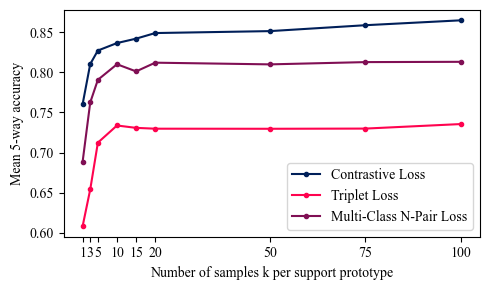

In [2]:
import json
import matplotlib.pyplot as plt

# Use Times New Roman for IEEE
# Reference: https://stackoverflow.com/a/40734893
plt.rcParams["font.family"] = "Times New Roman"

# Color scheme
colors = [
    (0, 0.12, 0.35),
    (1, 0.01, 0.31),
    (0.5,0.06,0.33),
]

# Load metrics for all models
with open(METRICS_FILEPATH, "r") as f:
    metrics = json.load(f)

plt.figure(figsize=(5, 3))

for i, [loss_name, model_metrics] in enumerate(metrics.items()):
    plt.plot(
        model_metrics["k"],
        model_metrics["acc"],
        label=loss_name,
        marker="o",
        markersize=3,
        color=colors[i]
    )
    plt.xticks(model_metrics["k"])

plt.legend()
plt.xlabel("Number of samples k per support prototype")
plt.ylabel("Mean 5-way accuracy")

plt.tight_layout()
plt.savefig(f"{FIG_DIR}/prototype_k_comparison.svg")
plt.show()
plt.close()